# Intro to Python: Projects

## Module 4 Project 1 ~ Reading Files

In [95]:
# Read() command
with open('example1.txt', 'r') as file:
    print('file mode:', file.mode)
    print('filename:', file.name)
    text = file.read()
    print('Raw File:\n', text) 
    
# Read with counts
with open('example1.txt', 'r') as file:
    characterCounts = [4, 4, 7, 15]
    for count in characterCounts:
        print(count, 'characters from file: \t', file.read(count))

# Readline ~ will not read more than the lines characters
with open('example1.txt', 'r') as file:
    characterCounts = [4, 7, 100]
    for count in characterCounts:
        print(count, 'characters from file: \t', file.readline(count))


# Readlines
with open('example1.txt', 'r', newline='') as file:
    contents = file.readlines()
    for index, line in enumerate(contents, start=1):
        print('Line', index, '=', line.replace('\n',''))

file mode: r
filename: example1.txt
Raw File:
 This is line 1
This is line 2
This is line 3
4 characters from file: 	 This
4 characters from file: 	  is 
7 characters from file: 	 line 1

15 characters from file: 	 This is line 2

4 characters from file: 	 This
7 characters from file: 	  is lin
100 characters from file: 	 e 1

Line 1 = This is line 1
Line 2 = This is line 2
Line 3 = This is line 3


## Module 4 Project 2 ~ Writing Files

In [96]:
with open('example2.txt', 'w') as file:
    file.write("This is line A\n")
    file.write('This is line B\n')

print('Initial Written File:')
with open('example2.txt','r') as readfile:
    print(readfile.read())

with open('example2.txt', 'a') as file:
    outlines = []
    for index in range(1, 11):
        outlines.append('This is line ' + str(index) + '\n')
    file.writelines(outlines)

print('Appended File:')
with open('example2.txt','r') as readfile:
    print(readfile.read())


Initial Written File:
This is line A
This is line B

Appended File:
This is line A
This is line B
This is line 1
This is line 2
This is line 3
This is line 4
This is line 5
This is line 6
This is line 7
This is line 8
This is line 9
This is line 10



In [97]:
# Copy Data from one to another file:
with open('example2.txt', 'r') as readfile:
    with open('example3.txt', 'w') as writefile:
        readlines = readfile.readlines()
        for line in readlines[::2]:
            writefile.write(line)

print('Copied File:')
with open('example3.txt','r') as readfile:
    print(readfile.read())



Copied File:
This is line A
This is line 1
This is line 3
This is line 5
This is line 7
This is line 9



In [98]:
# Write Files Exercise
#Run this prior to starting the exercise
from random import randint as rnd

memReg = 'members.txt'
exReg = 'inactive.txt'
fee =['yes','no']

def genFiles(current,old):
    with open(current,'w', newline='\n', encoding='ascii') as writefile: 
        writefile.write('Membership No\tDate Joined\tActive\n')
        data = "{:^13}  {:<11}  {:<6}\n"
        outlines = []

        for rowno in range(20):
            date = str(rnd(2015,2020))+ '-' + str(rnd(1,12))+'-'+str(rnd(1,25))
            outline = str(rnd(10000,99999)) + '\t' + str(date) + '\t' + str(fee[rnd(0,1)] + '\n')
            if rowno == max(range(20)):
                outline = outline[:-1]
            outlines.append(outline) 
        writefile.writelines(outlines)


    with open(old,'w', newline='\n', encoding='ascii') as writefile: 
        outlines = []
        writefile.write('Membership No\tDate Joined\tActive\n')
        data = "{:^13}  {:<11}  {:<6}\n"
        for rowno in range(3):
            date = str(rnd(2015,2020))+ '-' + str(rnd(1,12))+'-'+str(rnd(1,25))
            outline = str(rnd(10000,99999)) + '\t' + str(date) + '\t' + str(fee[1] + '\n')
            if rowno == max(range(3)):
                outline = outline[:-1]
            outlines.append(outline) 
        writefile.writelines(outlines)

genFiles(memReg,exReg)


In [99]:
import csv

# print('Initial Member List:')
# with open('members.txt','r') as readfile:
#     print(readfile.read())

# print('Initial Inactive List:')
# with open('inactive.txt','r') as readfile:
#     print(readfile.read())

activemembers = []
inactivemembers = []

with open('members.txt', 'r', newline='', encoding='ascii') as membersfile:
    with open('inactive.txt', 'r', newline='', encoding='ascii') as inactivefile:
        membersData = csv.DictReader(membersfile, delimiter='\t')
        inactiveData = csv.DictReader(inactivefile, delimiter='\t')
        for member in membersData:
            if member['Active'] == 'yes':
                activemembers.append(member)
            else: 
                inactivemembers.append(member)
        for member in inactiveData:
            if member['Active'] == 'yes':
                activemembers.append(member)
            else: 
                inactivemembers.append(member)

with open('members.txt', 'w', newline='', encoding='ascii') as membersfile:
    with open('inactive.txt', 'w', newline='', encoding='ascii') as inactivefile:
        memberheader = list(activemembers[0].keys()) 
        membersWriter = csv.DictWriter(membersfile, fieldnames=memberheader, delimiter='\t')
        membersWriter.writeheader()
        membersWriter.writerows(activemembers)
        inactiveheader = list(inactivemembers[0].keys())
        inactiveWriter = csv.DictWriter(inactivefile, fieldnames=inactiveheader, delimiter='\t')
        inactiveWriter.writeheader()
        inactiveWriter.writerows(inactivemembers)

# print('Updated Member List:')
# with open('members.txt','r') as readfile:
#     print(readfile.read())

# print('Updated Inactive List:')
# with open('inactive.txt','r') as readfile:
#     print(readfile.read())


## Module 4 Project 3 ~ Pandas

In [114]:
import pandas as pd

simpleData = [10, 20, 30, 40, 50]
s = pd.Series(simpleData)
print('SIMPLE DATA ~ SERIES')
print('Return Series:\n', s)
print('Return Series value s[2]:', s[2])
print('Return Series value using iloc s.iloc[3]:', s.iloc[3])
print('Return Series slice s[1:4]:\n', s[1:4])




SIMPLE DATA ~ SERIES
Return Series:
 0    10
1    20
2    30
3    40
4    50
dtype: int64
Return Series value s[2]: 30
Return Series value using iloc s.iloc[3]: 40
Return Series slice s[1:4]:
 1    20
2    30
3    40
dtype: int64


In [129]:
import pandas as pd

mediumData = {'Name': ['Alice', 'Bob', 'Charlie', 'David'],
        'Age': [25, 30, 35, 28],
        'City': ['New York', 'San Francisco', 'Los Angeles', 'Chicago']}

print('MEDIUM DATA ~ DATA FRAME')
medDf = pd.DataFrame(mediumData)
print('Raw Data Frame:\n', medDf)
print('Data Frame Column medDf[\'Name\', \'City\']:\n', medDf[['Name', 'City']])
print('Data Frame Row medDf.iloc[1:3]:\n', medDf.iloc[1:3])

sliceMedDf = medDf[['Name', 'Age']]
sliceMedDf = medDf[1:3]
print(sliceMedDf)

MEDIUM DATA ~ DATA FRAME
Raw Data Frame:
       Name  Age           City
0    Alice   25       New York
1      Bob   30  San Francisco
2  Charlie   35    Los Angeles
3    David   28        Chicago
Data Frame Column medDf['Name', 'City']:
       Name           City
0    Alice       New York
1      Bob  San Francisco
2  Charlie    Los Angeles
3    David        Chicago
Data Frame Row medDf.iloc[1:3]:
       Name  Age           City
1      Bob   30  San Francisco
2  Charlie   35    Los Angeles
      Name  Age           City
1      Bob   30  San Francisco
2  Charlie   35    Los Angeles


In [ ]:
import pandas as pd

df = pd.read_csv('customers-1000.csv')
# unique values
print('Unique Function ~ Usable on Series')
print(df['Last Name'].unique()[0:5])
# conditionals for data
print('Data Frame Conditional')
df_bettercall = df[df['Last Name']=='Goodman']
print('iloc[0] ~ First Column of Data associated to its headings')
print(df_bettercall.iloc[0])
print('iloc[0,1]')
print(df_bettercall.iloc[0,1])
print('loc[0,\'First Name\']')
print(df_bettercall.loc[0, 'First Name'])
print(df_bettercall)
df_bettercall.to_csv('betterCallSaul.csv')

# Note iloc ~ returns based on indexes [row index(int), column index(int)]
# Note loc ~ returns based on references [row index, column header]
    # Row index can be set using df.set_index(new index column)
# Re-index with names as the index
df_bettercall_names = df_bettercall.set_index('First Name')
print('Retrieve last name for corresponding to first name \'Andrew\'\n.loc[\'Andrew\', \'Last Name\']')
print(df_bettercall_names.loc['Andrew', 'Last Name'])

Unique Function ~ Usable on Series
['Goodman' 'Lane' 'Harding' 'Ford' 'Woods']
Data Frame Conditional
iloc[0] ~ First Column of Data associated to its headings
Index                                            1
Customer Id                        dE014d010c7ab0c
First Name                                  Andrew
Last Name                                  Goodman
Company                              Stewart-Flynn
City                                   Rowlandberg
Country                                      Macao
Phone 1                          846-790-4623x4715
Phone 2                        (422)787-2331x71127
Email                marieyates@gomez-spencer.info
Subscription Date                       2021-07-26
Website                       http://www.shea.biz/
Name: 0, dtype: object
iloc[0,1]
dE014d010c7ab0c
loc[0,'First Name']
Andrew
     Index      Customer Id First Name Last Name  \
0        1  dE014d010c7ab0c     Andrew   Goodman   
69      70  2413aA72C4DEadF      David   Goodman

In [150]:

import requests
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/LXjSAttmoxJfEG6il1Bqfw/Product-sales.csv"
filename = 'Product-Sales.csv'

def download_file(url, filename):
    try:
        response = requests.get(url)
        response.raise_for_status()

        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f'file download successfully to {filename}')
    except requests.exceptions.RequestException as e:
        print(f'error downloading file: {e}')

download_file(url, filename)
df = pd.read_csv("Product-sales.csv")

file download successfully to Product-Sales.csv


In [151]:
df = pd.read_csv("Product-sales.csv")
df.head()

,OrderID,Product,Category,Quantity,Price,Total,OrderDate,CustomerCity
0,1,Laptop,Electronics,2,800,1600,2022-01-10,New York
1,2,Smartphone,Electronics,3,600,1800,2022-02-15,Los Angeles
2,3,Desk Chair,Furniture,5,150,750,2022-03-12,Chicago
3,4,Notebook,Stationery,10,2,20,2022-04-05,Houston
4,5,Monitor,Electronics,1,300,300,2022-05-21,Miami


In [3]:
import pandas as pd

import sys
print(sys.path.append(r'C:\\Code\\Python\\HelperFunctions'))
from helperFunctions import download_file

xlsx_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n9LOuKI9SlUa1b5zkaCMeg/Product-sales.xlsx'

download_file(xlsx_path, "Product-sales.xlsx")
df = pd.read_excel("Product-sales.xlsx")
df.head()


None
file download successfully to Product-sales.xlsx


,OrderID,Product,Category,Quantity,Price,Total,OrderDate,CustomerCity
0,1,Laptop,Electronics,2,800,1600,2022-01-10,New York
1,2,Smartphone,Electronics,3,600,1800,2022-02-15,Los Angeles
2,3,Desk Chair,Furniture,5,150,750,2022-03-12,Chicago
3,4,Notebook,Stationery,10,2,20,2022-04-05,Houston
4,5,Monitor,Electronics,1,300,300,2022-05-21,Miami


In [8]:
import pandas as pd

df = pd.read_excel("Product-sales.xlsx")
print(df)
x = df['Product']
print(x)
y = df[['Product', 'Category', 'Quantity']]
print(y)

   OrderID     Product     Category  Quantity  Price  Total  OrderDate  \
0        1      Laptop  Electronics         2    800   1600 2022-01-10   
1        2  Smartphone  Electronics         3    600   1800 2022-02-15   
2        3  Desk Chair    Furniture         5    150    750 2022-03-12   
3        4    Notebook   Stationery        10      2     20 2022-04-05   
4        5     Monitor  Electronics         1    300    300 2022-05-21   

  CustomerCity  
0     New York  
1  Los Angeles  
2      Chicago  
3      Houston  
4        Miami  
0        Laptop
1    Smartphone
2    Desk Chair
3      Notebook
4       Monitor
Name: Product, dtype: object
      Product     Category  Quantity
0      Laptop  Electronics         2
1  Smartphone  Electronics         3
2  Desk Chair    Furniture         5
3    Notebook   Stationery        10
4     Monitor  Electronics         1


In [ ]:
import pandas as pd

# Using index location iloc and location loc
df = pd.read_excel("Product-sales.xlsx")
print(df)
print('df.iloc[0,2]:', df.iloc[0,2])
print('df.iloc[1,2]:', df.iloc[1,2])
print('df.loc[0, \'Product\']:', df.loc[0, 'Product'])
print('df.loc[0, \'Category\']:', df.loc[0, 'Category'])
print('df.loc[0, \'Total\']:', df.loc[0, 'Total'])




   OrderID     Product     Category  Quantity  Price  Total  OrderDate  \
0        1      Laptop  Electronics         2    800   1600 2022-01-10   
1        2  Smartphone  Electronics         3    600   1800 2022-02-15   
2        3  Desk Chair    Furniture         5    150    750 2022-03-12   
3        4    Notebook   Stationery        10      2     20 2022-04-05   
4        5     Monitor  Electronics         1    300    300 2022-05-21   

  CustomerCity  
0     New York  
1  Los Angeles  
2      Chicago  
3      Houston  
4        Miami  
df.iloc[0,2]: Electronics
df.iloc[1,2]: Electronics
df.loc[0, 'Product']: Laptop
df.loc[0, 'Category']: Electronics
df.loc[0, 'Total']: 1600


In [16]:
import pandas as pd

# Using Slices 
df = pd.read_excel("Product-sales.xlsx")
indexSlice = df.iloc[0:2,1:3]
print('df.iloc[0:2,1:3]:')
print(indexSlice)
locSlice = df.loc[0:3, 'Product':'Total']
print('df.iloc[0:3,\'Product\':\'Total\']:')
print(locSlice)





df.iloc[0:2,1:3]:
      Product     Category
0      Laptop  Electronics
1  Smartphone  Electronics
df.iloc[0:3,'Product':'Total']:
      Product     Category  Quantity  Price  Total
0      Laptop  Electronics         2    800   1600
1  Smartphone  Electronics         3    600   1800
2  Desk Chair    Furniture         5    150    750
3    Notebook   Stationery        10      2     20


In [29]:
import pandas as pd

# Quiz 
df = pd.read_excel("Product-sales.xlsx")
q = df[['Price']]
r = df[['Product','Category']]

print(q)
print(r)
print(df.iloc[1,2])
newIndexes = ['a', 'b', 'c', 'd', 'e']
df_new = df[:]
df_new.index = newIndexes
print(df_new.loc['a', 'CustomerCity'])


   Price
0    800
1    600
2    150
3      2
4    300
      Product     Category
0      Laptop  Electronics
1  Smartphone  Electronics
2  Desk Chair    Furniture
3    Notebook   Stationery
4     Monitor  Electronics
Electronics
New York


## Module 4 Project 4 ~ Numpy

### Simple Numpy Functions and 1d Arrays

In [77]:
# Simple Array Characteristics
import numpy as np
a = np.array([0, 1, 2, 3, 4, 5])
print('Raw Array:')
print(a)
print('Type:', type(a))
print('DataType of Array:', a.dtype)
print('Size of the Array', a.size)
print('Shape of the Array:', a.shape)
print('N-Dimensions of the Array:', a.ndim)

Raw Array:
[0 1 2 3 4 5]
Type: <class 'numpy.ndarray'>
DataType of Array: int64
Size of the Array 6
Shape of the Array: (6,)
N-Dimensions of the Array: 1


In [78]:
# Slicing and Editing Arrays
import numpy as np
a = np.array([0, 1, 2, 3, 4, 5])
print('Raw Array:')
print(a)
a[0] = 100
print('Updated Array:')
print(a)
a[4] = 0
print('2nd Updated Array:')
print(a)
b = a[3:5]
print('Sliced Array:')
print(b)
a[3:5] = [300, 400]
print('3rd Updated Array:')
print(a)

Raw Array:
[0 1 2 3 4 5]
Updated Array:
[100   1   2   3   4   5]
2nd Updated Array:
[100   1   2   3   0   5]
Sliced Array:
[3 0]
3rd Updated Array:
[100   1   2 300 400   5]


In [79]:
# Basic Numpy Operations
# Vector Addition: 
# [0] + [1] = [1]
# [1]   [0]   [1]
# simply array addition ~ i.e. a + b ~ for array a and b
# Vector Multiplication with Scalar
# [2] * 2 = [4]
# [4]       [8]
# simply scalar multiply by array ~ i.e. 2*x ~ for array x and scalar 2
# Array Multiplication ~ Hadamard Product
# [1] * [3] = [3]
# [2]   [2]   [4]
# simply array multiplication ~ i.e. a * b ~ for array a and b
# Dot Product
# [1] * [3] = (3 * 1) + (2 * 1) = 5
# [2]   [1]   
# done using built in dot product function ~ i.e. np.dot(u, v) ~ for arrays u and v
# Scalar addition:
# [2] + 1 = [3]
# [4]       [5]
# simply scalar add to array ~ i.e. x + 1 ~ for array x and scalar 1

# Universal functions
import numpy as np
a = np.array([0, 1, 2])
b = np.array([3, 4, 5])
print('Raw Arrays:')
print('a:')
print(a)
print('b:')
print(b)
print('a * b:', a * b)
print('a * b:', a + b)
print('a * 3:', a * 3)
print('4 + b:', 4 + b)
print('np.dot(a, b):', np.dot(a, b))

grades = np.array([60, 99, 85, 75, 93, 83, 78, 87, 96, 68])
print('grades array:')
print(grades)
print('grades.max():', grades.max())
print('grades.min():', grades.min())
print('grades.mean():', grades.mean())
print('grades.std():', grades.std())


Raw Arrays:
a:
[0 1 2]
b:
[3 4 5]
a * b: [ 0  4 10]
a * b: [3 5 7]
a * 3: [0 3 6]
4 + b: [7 8 9]
np.dot(a, b): 14
grades array:
[60 99 85 75 93 83 78 87 96 68]
grades.max(): 99
grades.min(): 60
grades.mean(): 82.4
grades.std(): 11.766052864066182


Array x:
[0.         1.57079633 3.14159265]
Array y (sin(x)):
[0.0000000e+00 1.0000000e+00 1.2246468e-16]
np.linspace(-5, 5, num=21):
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]


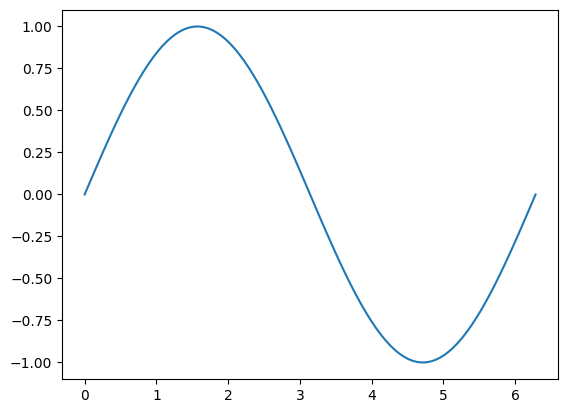

In [73]:
# Functions applied to arrays i.e. "sin" import numpy as np

x = np.array([0, np.pi/2, np.pi])
y = np.sin(x)
print('Array x:')
print(x)
print('Array y (sin(x)):')
print(y)

# Linespace ~ useful in generating evenly distributed points
points = np.linspace(-5, 5, num=21)
print('np.linspace(-5, 5, num=21):')
print(points)

# example with plots
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, num=100)
y = np.sin(x)
plt.plot(x,y)



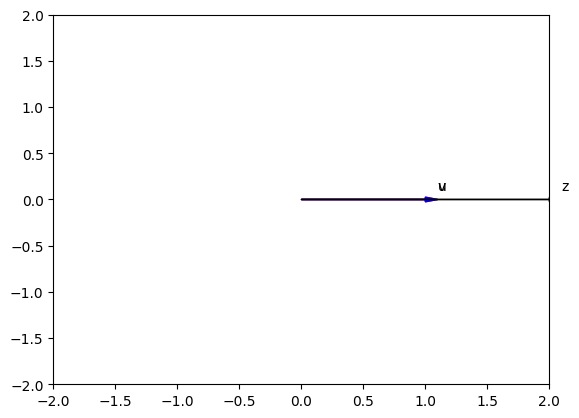

In [74]:
# Plotting functions


import time 
import sys
import numpy as np 

import matplotlib.pyplot as plt


def Plotvec1(u, z, v):
    
    ax = plt.axes() # to generate the full window axes
    ax.arrow(0, 0, *u, head_width=0.05, color='r', head_length=0.1)# Add an arrow to the  U Axes with arrow head width 0.05, color red and arrow head length 0.1
    plt.text(*(u + 0.1), 'u')#Adds the text u to the Axes 
    
    ax.arrow(0, 0, *v, head_width=0.05, color='b', head_length=0.1)# Add an arrow to the  v Axes with arrow head width 0.05, color red and arrow head length 0.1
    plt.text(*(v + 0.1), 'v')#Adds the text v to the Axes 
    
    ax.arrow(0, 0, *z, head_width=0.05, head_length=0.1)
    plt.text(*(z + 0.1), 'z')#Adds the text z to the Axes 
    plt.ylim(-2, 2)#set the ylim to bottom(-2), top(2)
    plt.xlim(-2, 2)#set the xlim to left(-2), right(2)


u = np.array([1, 0])
v = np.array([1, 0])
z = np.add(u, v)

Plotvec1(u, z, v)


In [75]:
# Numpy Quiz
arr1 = np.array([10, 11, 12, 13, 14, 15])
arr2 = np.array([20, 21, 22, 23, 24, 25])
arrAdd = arr1 + arr2
print('array 1:')
print(arr1)
print('array 2:')
print(arr2)
print('array 1 + array 2')
print(arrAdd)
print('array 1 + array 2')
print(np.subtract(arr1, arr2))

arr3 = np.array([10, 20, 30, 40, 50, 60])
arr4 = np.array([2, 1, 2, 3, 4, 5])
print('array 3:')
print(arr3)
print('array 4:')
print(arr4)
print('array 3 * array 4:')
print(np.multiply(arr3, arr4))
print('array 3 / array 4:')
print(arr3 / arr4)
print('dot product array 3 & array 4:')
print(np.dot(arr3, arr4))




array 1:
[10 11 12 13 14 15]
array 2:
[20 21 22 23 24 25]
array 1 + array 2
[30 32 34 36 38 40]
array 1 + array 2
[-10 -10 -10 -10 -10 -10]
array 3:
[10 20 30 40 50 60]
array 4:
[2 1 2 3 4 5]
array 3 * array 4:
[ 20  20  60 120 200 300]
array 3 / array 4:
[ 5.         20.         15.         13.33333333 12.5        12.        ]
dot product array 3 & array 4:
720


In [76]:
import numpy as np
arr = np.array([10, 20, 30, 40, 50, 60])
for x in arr:
    print(x)

10
20
30
40
50
60


### Complex Numpy Functions and 2d Arrays

In [84]:
import numpy as np
# Dimensions are accomplished via List Nesting 1d = [1, 2, 3], 2d = [[1],[2],[3]]
a = np.array([[11, 12, 13],[21, 22, 23],[31, 32, 33]])
print('Raw Array:')
print(a)
print('Type:', type(a))
print('DataType of Array:', a.dtype)
print('Size of the Array', a.size)
print('Shape of the Array:', a.shape)
print('N-Dimensions of the Array:', a.ndim)
print('Accessing Elements from the list via Indexes ~ Array[Row][Column]')
print('a[0][0]:', a[0][0])
print('a[1][1]:', a[1][1])
print('a[2][0]:', a[2][0])
print('Accessing Elements from single index ~ Array[Row, Column]')
print('a[2, 2]:', a[2, 2])
print('a[1, 1]:', a[1, 1])
print('a[0, 2]:', a[0, 2])

Raw Array:
[[11 12 13]
 [21 22 23]
 [31 32 33]]
Type: <class 'numpy.ndarray'>
DataType of Array: int64
Size of the Array 9
Shape of the Array: (3, 3)
N-Dimensions of the Array: 2
Accessing Elements from the list via Indexes ~ Array[Row][Column]
a[0][0]: 11
a[1][1]: 22
a[2][0]: 31
Accessing Elements from single index ~ Array[Row, Column]
a[2, 2]: 33
a[1, 1]: 22
a[0, 2]: 13


In [86]:
# Slicing 2d Arrays
a = np.array([[11, 12, 13],[21, 22, 23],[31, 32, 33]])
print('Raw Array:')
print(a)
b = a[0:2, 0:2]
print('Sliced 0:2, 0:2 ~')
print(b)

Raw Array:
[[11 12 13]
 [21 22 23]
 [31 32 33]]
Sliced 0:2, 0:2 ~
[[11 12]
 [21 22]]


In [92]:
# Array operations
x = np.array([[1, 0],[0, 1]])
y = np.array([[2, 1],[1, 2]])
print('x:')
print(x)
print('y:')
print(y)
print('x + y')
print(x + y)
print('3 * x')
print(x * 3)
print('x * y')
print(x * y)
print('np.dot(x, y)')
print(np.dot(x,y))


x:
[[1 0]
 [0 1]]
y:
[[2 1]
 [1 2]]
x + y
[[3 1]
 [1 3]]
3 * x
[[3 0]
 [0 3]]
x * y
[[2 0]
 [0 2]]
np.dot(x, y)
[[2 1]
 [1 2]]


In [100]:
# matrix multiplication
a = np.array([[0, 1, 1],[1, 0, 1]])
b = np.array([[1, 1],[1, 1],[-1, 1]])
print('a:')
print(a)
print('b:')
print(b)
c = np.matmul(a, b)
print('a * b:')
print(c)
d = np.matmul(b, a)
print('b * a:')
print(d)
z = np.sin(np.dot(a, b))
print('sin(a * b):')
print(z)
print('original b:')
print(b)
print('transpose b (b.T):')
print(b.T)

a:
[[0 1 1]
 [1 0 1]]
b:
[[ 1  1]
 [ 1  1]
 [-1  1]]
a * b:
[[0 2]
 [0 2]]
b * a:
[[ 1  1  2]
 [ 1  1  2]
 [ 1 -1  0]]
sin(a * b):
[[0.         0.90929743]
 [0.         0.90929743]]
original b:
[[ 1  1]
 [ 1  1]
 [-1  1]]
transpose b (b.T):
[[ 1  1 -1]
 [ 1  1  1]]


In [105]:
# Quiz

a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('size a:', a.size)
print('slice a:')
print(a[0][0:2])
b = np.array([[0, 1], [1, 0], [1, 1], [-1, 0]])
print('a:')
print(a)
print('b')
print(b)
print('a * b')
c = np.matmul(a, b)
print(c)

size a: 12
slice a:
[1 2]
a:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
b
[[ 0  1]
 [ 1  0]
 [ 1  1]
 [-1  0]]
a * b
[[ 1  4]
 [ 5 12]
 [ 9 20]]
